In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importar Salary_Data.csv
#Leer Dataset

df = pd.read_csv('Salary_Data.csv')
df.head() #->Es bueno ir visualizando para ver el progreso o en qué estado se encuentra el Dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#Exploración de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


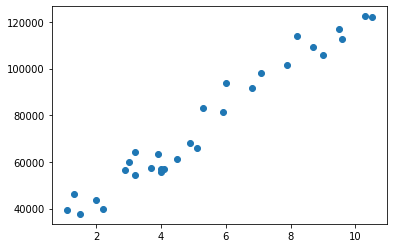

In [ ]:
#Seleccionamos las columnas
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

plt.scatter(x,y)

In [ ]:
x = x.reshape(-1, 1) #Cambiar los datos a vector columna porque inicialmente estaba como un vector fila
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

#Utilizando SKLearn



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#CREAR EL MODELO
model = LinearRegression(fit_intercept = True)      #Si fit_intercept es true, incluimos theta0. Intercepto
                                                    #Esta línea únicamente crea el model

In [ ]:
#Ajustar el modelo a los datos
model.fit(x,y)

LinearRegression()

In [ ]:
#Imprimir los valores finales de theta (Parámetros)
print(model.intercept_)  #sklearn llama distinto a los parámetros, theta = intercept
print(model.coef_) #theta1

25792.200198668696
[9449.96232146]


In [ ]:
model.predict(np.array([[6]]))

array([82491.9741274])

In [ ]:
model.predict(x)

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [ ]:
hyp = model.predict(x)

In [ ]:
resultados = {'y': y, 'hyp' : hyp}
comparativo = pd.DataFrame(resultados)
comparativo.head(10)

,y,hyp
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


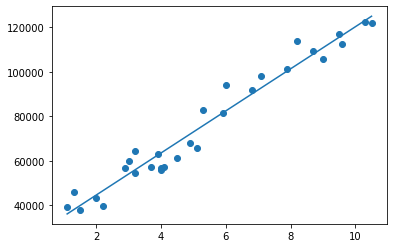

In [ ]:
plt.scatter(x,y)
plt.plot(x,hyp)

In [ ]:
from sklearn import metrics

In [ ]:
print("MSE (Mean Squared Error = )",metrics.mean_squared_error(y, hyp))
print('R2 = ', metrics.r2_score(y,hyp)) # 0.95 es un buen modelo, mientras más cercano al 1 el modelo es mejor

MSE (Mean Squared Error = ) 31270951.722280964
R2 =  0.9569566641435086


##Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
aux = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias = True) #Elevar a la potencia que elijamos, # Se pone true o false para incluir la columna de 1's
poly.fit_transform(aux[:,None]) #None para indicar que son 3 muestras y una columna

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [ ]:
# Leyendo el dataset
df = pd.read_csv('bottle.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df[['Salnty','T_degC']]
X

,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  817509 non-null  float64
 1   T_degC  853900 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [ ]:
#Eliminar las filas con valores nulos:
X.dropna(axis=0,inplace=True) # El inplace = true es para que sobreescriba el resultado en la misma variables
#X = X.dropna(axis=0,inplace=False) #Ambas líneas de código hacen lo mismo
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
X.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [ ]:
X = X.iloc[:500,:] #cortar el dataset, mantener las primeras 500 filas
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 506
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  500 non-null    float64
 1   T_degC  500 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB


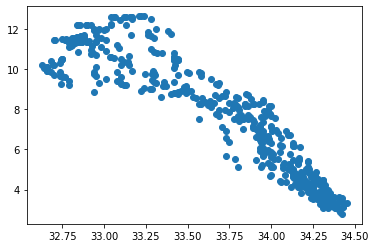

In [ ]:
#Graficando los datos
x = np.array(X['Salnty'])
y = np.array(X['T_degC'])
plt.scatter(x,y)

In [ ]:
poly = PolynomialFeatures(4, include_bias = False)
x_pol = poly.fit_transform(x[:,None])

In [ ]:
x_pol

array([[3.34400000e+01, 1.11823360e+03, 3.73937316e+04, 1.25044638e+06],
       [3.34400000e+01, 1.11823360e+03, 3.73937316e+04, 1.25044638e+06],
       [3.34370000e+01, 1.11803297e+03, 3.73836684e+04, 1.24999772e+06],
       ...,
       [3.32650000e+01, 1.10656022e+03, 3.68097259e+04, 1.22447553e+06],
       [3.32800000e+01, 1.10755840e+03, 3.68595436e+04, 1.22668561e+06],
       [3.32960000e+01, 1.10862362e+03, 3.69127319e+04, 1.22904632e+06]])

In [ ]:
# Entrenar el modelo
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(x_pol, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print(model.intercept_)
print(model.coef_)

-2559880.647715033
[ 3.02613176e+05 -1.34152554e+04  2.64332234e+02 -1.95328121e+00]


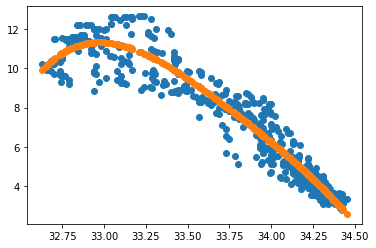

In [ ]:
# Visualizar la hipótesis sobre los datos
y_pred = model.predict(x_pol)
plt.scatter(x,y)
plt.scatter(x, y_pred)

In [ ]:
print("MSE = ",metrics.mean_squared_error(y, y_pred))
print("R2 = ",metrics.r2_score(y, y_pred))

MSE =  0.6799193848007736
R2 =  0.9207785807997206
